In [ ]:
# Setup larsoftobj, and use pyROOT to run gallery functions
# Read in an art-ROOT file and plot a optical waveform

In [1]:
import os, sys
import ROOT
ROOT.gStyle.SetOptStat(0)

# Some functions that I find useful to reduce error-prone typing.
def read_header(h):
    """Make the ROOT C++ jit compiler read the specified header."""
    ROOT.gROOT.ProcessLine('#include "%s"' % h)

def provide_get_valid_handle(klass):
    """Make the ROOT C++ jit compiler instantiate the
    Event::getValidHandle member template for template
    parameter klass."""
    ROOT.gROOT.ProcessLine('template gallery::ValidHandle<%(name)s> gallery::Event::getValidHandle<%(name)s>(art::InputTag const&) const;' % {'name' : klass})


filenames = ROOT.vector(ROOT.string)(1, "/Users/yuntse/Data/icarus/v06_69_01/prod_nu/detsim/single_nu_icarus_ec39a03a-8e48-44c6-8327-d8139f86cf52_20180314T235703_g4_20180315T110549_detsim.root")
read_header('gallery/ValidHandle.h')
provide_get_valid_handle('std::vector< raw::OpDetWaveform >')
opdetwf_tag = ROOT.art.InputTag("opdaq")
ev = ROOT.gallery.Event( filenames )
get_opdetwfs = ev.getValidHandle( ROOT.vector( ROOT.raw.OpDetWaveform ) )

Welcome to JupyROOT 6.12/04


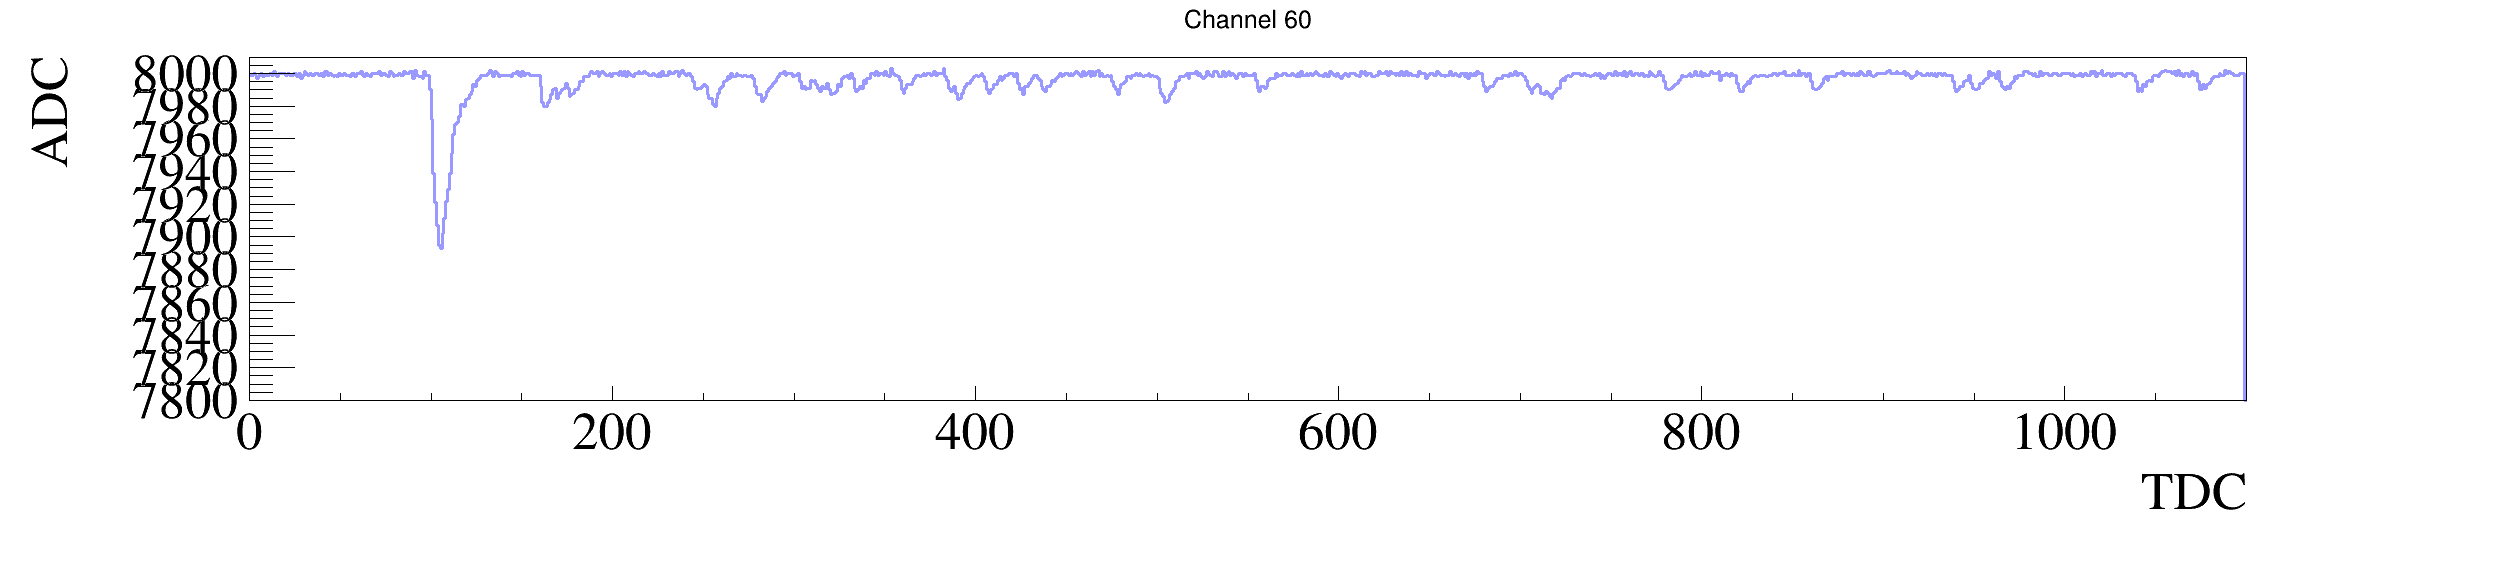

In [2]:
# while ( not ev.atEnd() ):
opdetwfs = get_opdetwfs( opdetwf_tag )
for opdetwf in opdetwfs.product():
    # wf = ROOT.std.vector("short")(opdetwf.Waveform())
    wf = opdetwf.Waveform()
    i = 0
    c = ROOT.TCanvas("opdet", "opdet", 2500, 600 )
    h = ROOT.TH1F("channel", "channel", wf.size(), 0, wf.size())
    min = 7900
    for adc in wf:
        h.SetBinContent(i, adc)
        if adc < min:
            min = adc
        # print adc
        i = i + 1
    h.GetYaxis().SetRangeUser( 7800, 8010 )
    h.SetLineWidth( 3 )
    h.SetLineColor( 591 )
    h.SetTitleSize(1)
    h.SetTitleFont(132)
    h.SetTitle( "Channel %d" % opdetwf.ChannelNumber() )

    h.GetXaxis().SetTitle("TDC")
    h.GetXaxis().SetTitleSize(0.1)
    h.GetXaxis().SetTitleFont(132)
    h.GetXaxis().SetLabelSize(0.1)
    h.GetXaxis().SetLabelFont(132)
    h.GetYaxis().SetTitle("ADC")
    h.GetYaxis().SetTitleSize(0.1)
    h.GetYaxis().SetTitleFont(132)
    h.GetYaxis().SetTitleOffset(0.5)
    h.GetYaxis().SetLabelSize(0.1)
    h.GetYaxis().SetLabelFont(132)
    h.Draw()
    c.SetBottomMargin(0.3)
    c.Draw()
    if min < 7900:
        break
    del h
    del c